In [3]:
##### %% load libraries
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import rc
import pandas as pd

In [4]:
# %% setup
rc('font',**{'family':'serif','serif':['Avant Garde']})
rc('text', usetex=True)

In [5]:
# %% workind directory
wd = os.getcwd()

In [6]:
# %% load nasdaq dataset

# file to read
in_file = os.path.join(wd, 'data', 'stockMarketData', '^dji.csv')

In [7]:
# read data
df = pd.read_csv(in_file)

df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,13261.820313,13279.540039,12991.370117,13043.959961,13043.959961,239580000
1,2008-01-03,13044.120117,13137.929688,13023.559570,13056.719727,13056.719727,200620000
2,2008-01-04,13046.559570,13046.719727,12789.040039,12800.179688,12800.179688,304210000
3,2008-01-07,12801.150391,12884.150391,12733.839844,12827.490234,12827.490234,306700000
4,2008-01-08,12820.900391,12906.419922,12565.410156,12589.070313,12589.070313,322690000


In [8]:
# cleaning
old_cols = df.columns
new_cols = ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']
df.rename(columns=dict(zip(old_cols, new_cols)), inplace=True)

In [15]:
# get info
df.head()
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [10]:
# data transformation
df.loc[:, 'date'] = pd.to_datetime(df['date'])

# preview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       504 non-null    datetime64[ns]
 1   open       504 non-null    float64       
 2   high       504 non-null    float64       
 3   low        504 non-null    float64       
 4   close      504 non-null    float64       
 5   adj_close  504 non-null    float64       
 6   volume     504 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.7 KB


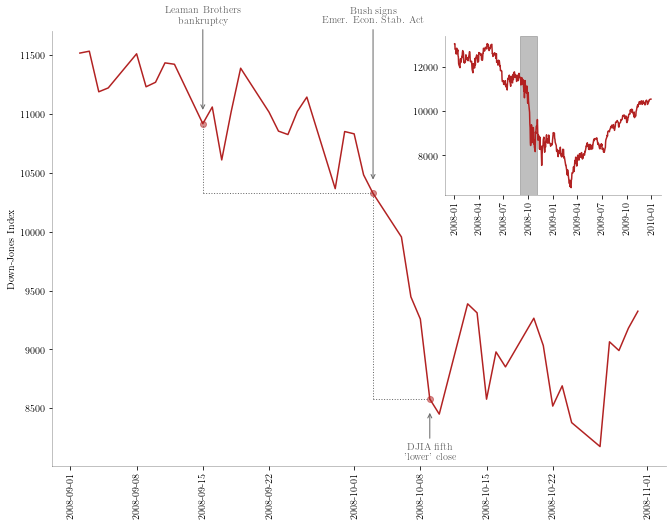

In [17]:
# %% visualization

# figure
fig = plt.figure(figsize=(11, 8))
# plot
ax = fig.add_subplot(111)

# data series
# --+ slice
slice = ((df['date'] >= pd.Timestamp(2008, 9, 1)) &
         (df['date'] <= pd.Timestamp(2008, 10, 31)))

# --+ time
t = df.loc[slice, 'date']
dji = df.loc[slice, 'adj_close']

# plot data
ax.plot(t, dji, color='firebrick')

# critical events
# --+ max
min, max = 8050, 11750
sep = 100
# --+ Leaman Brothers' bankruptcy
lb = pd.Timestamp(2008, 9, 15)
lb_y = df.loc[df['date'] == lb,'adj_close'].values
ax.annotate("Leaman Brothers\nbankruptcy",
            xy=(lb, lb_y + sep), xycoords='data',
            xytext=(lb, max), textcoords='data',
            color='dimgrey',
            va="bottom", ha="center",
            arrowprops=dict(arrowstyle="->", ec="dimgrey",
                            connectionstyle="arc3"),)
ax.scatter(lb, lb_y, marker='o', color='firebrick', alpha=0.5)

# --+ Emergency Economic Stabilization Act of 2008
hr = pd.Timestamp(2008, 10, 3)
hr_y = df.loc[df['date'] == hr,'adj_close'].values
ax.annotate("Bush signs\nEmer. Econ. Stab. Act",
            xy=(hr, hr_y + sep), xycoords='data',
            xytext=(hr, max), textcoords='data',
            color='dimgrey',
            va="bottom", ha="center",
            arrowprops=dict(arrowstyle="->", ec='dimgrey',
                            connectionstyle="arc3"),)
ax.scatter(hr, hr_y, marker='o', color='firebrick', alpha=0.5)

# --+ Fifth negative session
fc = pd.Timestamp(2008, 10, 9)
fc_y = df.loc[df['date'] == fc,'adj_close'].values
ax.annotate("DJIA fifth\n'lower' close",
            xy=(fc, fc_y - sep), xycoords='data',
            xytext=(fc, min), textcoords='data',
            color='dimgrey',
            va="bottom", ha="center",
            arrowprops=dict(arrowstyle="->", ec='dimgrey',
                            connectionstyle="arc3"),)
ax.scatter(fc, fc_y, marker='o', color='firebrick', alpha=0.5)

# connections
ax.vlines(x=lb, ymax=lb_y, ymin=hr_y, linewidth=1, linestyles='dotted',
          color='dimgrey')
ax.hlines(y=hr_y, xmin=lb, xmax=hr, linewidth=1, linestyles='dotted',
          color='dimgrey')
ax.vlines(x=hr, ymax=hr_y, ymin=fc_y, linewidth=1, linestyles='dotted',
          color='dimgrey')
ax.hlines(y=fc_y, xmin=hr, xmax=fc, linewidth=1, linestyles='dotted',
          color='dimgrey')

# lighten borders
ax.spines["top"].set_alpha(0)
ax.spines["bottom"].set_alpha(.3)
ax.spines["right"].set_alpha(0)
ax.spines["left"].set_alpha(.3)

# axes
ax.set_ylabel(r'Down-Jones Index')
ax.xaxis.set_tick_params(rotation=90)

# inset# draw graph in inset
axins = inset_axes(ax, width=3, height=2.2)
axins.plot(df['date'], df['adj_close'], color='firebrick')
axins.axvspan(pd.Timestamp(2008, 9, 1), pd.Timestamp(2008, 11, 1),
              color='gray', alpha=0.5)
axins.spines["top"].set_alpha(0)
axins.spines["bottom"].set_alpha(.3)
axins.spines["right"].set_alpha(0)
axins.spines["left"].set_alpha(.3)
axins.xaxis.set_tick_params(rotation=90) # produce a box

# save plot
out_f = os.path.join(os.getcwd(), 'interrupted_time_series.pdf')
fig.savefig(out_f,
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)
# show plot
plt.show()